In [1]:
import numpy as np
%load_ext wurlitzer
%matplotlib inline
import matplotlib.pyplot as plt
import json
import copy
import math

import energyflow as ef

In [2]:
def load_graphs(file_path):
    with open(file_path, 'r') as file:
        graphs = json.load(file)
    return graphs

In [3]:
def get_pair():
    hadron_graph = 'hadron_level_graphs_.json'
    parton_graph = 'parton_level_graphs_.json' ## change to gluon collision or parton if needed

    hadron_graph_data = load_graphs(hadron_graph)
    parton_graph_data = load_graphs(parton_graph)

    return hadron_graph_data, parton_graph_data

In [4]:
# def rotate_nopi(jet, angle):
#     for particle in jet:
#         particle[2]+=angle
        
#     for particle in jet:
#         particle[2] = (particle[2]) % (2 * np.pi)
        
# def rotate(jet, angle):
#     # Ensure angle is in radians
#     angle = angle % (2 * np.pi)  # Normalize input angle
#     for particle in jet:
#         # Rotate azimuthal angle and normalize to [0, 2*pi)
#         particle[2] = (particle[2] + angle) % (2 * np.pi) -np.pi
        
def rotate(jet, angle):
    """
    Rotate the azimuthal angle (phi) of particles in a jet by a given angle.
    Normalize angles to the range [-pi, pi).
    """
    for particle in jet:
        # Add rotation angle and normalize
        particle[2] = (particle[2] + angle)
#         particle[2] = ((particle[2] + angle + np.pi) % (2 * np.pi)) - np.pi



In [5]:
# def center_jet(jet):
#     phi_angles = [particle[2] for particle in jet]
#     mean_phi = np.mean(phi_angles)
    
#     for particle in jet:
#         particle[2] -= mean_phi
    
#     for particle in jet:
#         particle[2] = (particle[2] + np.pi) % (2 * np.pi) - np.pi  # Wrap to [-π, π]


In [6]:
def center_phi(jet):
    """
    Center the phi values of the jet by first converting to Cartesian coordinates (cos(phi), sin(phi)),
    then subtracting the mean x and y values from each point, and finally converting back to phi.
    """
    # Convert phi to Cartesian coordinates
    x_coords = [np.cos(particle[2]) for particle in jet]
    y_coords = [np.sin(particle[2]) for particle in jet]

    # Compute the mean of the Cartesian coordinates
    mean_x = np.mean(x_coords)
    mean_y = np.mean(y_coords)

    # Shift and convert back to phi
    for i, particle in enumerate(jet):
        x_shifted = x_coords[i] - mean_x
        y_shifted = y_coords[i] - mean_y
        particle[2] = np.arctan2(y_shifted, x_shifted)  # np.arctan2 handles the range [-pi, pi]

    return jet


In [7]:
Hs, Ps = [], []
hadron_graph_data, parton_graph_data = get_pair()

# print(hadron_graph_data[0]['node_features'][0])

# event feautures particle

for hadron_event, parton_event in zip(hadron_graph_data, parton_graph_data):

    new_hadron_event = []
    new_parton_event = []

    new_hadron_particle = []
    new_parton_particle = []

    
    # print(hadron_event['node_features'])  # To see the structure of the array


    for hadron_particle in hadron_event['node_features']:
            
        new_hadron_particle = np.array([hadron_particle[0], hadron_particle[1], hadron_particle[2]])
        
        new_hadron_event.append(new_hadron_particle)
        
    Hs.append(np.array(new_hadron_event))
    
    for parton_particle in parton_event['node_features']:
        
        new_parton_particle = np.array([parton_particle[0], parton_particle[1],parton_particle[2]])
    
        new_parton_event.append(new_parton_particle)
        
    Ps.append(np.array(new_parton_event))




In [8]:
x=7
emdval, G = ef.emd.emd(Ps[x], Ps[x], R=1, return_flow=True)
# print(f'EMD before rotation: {emdval:.1f} GeV')
# print(Ps[7])

In [9]:
def plot_jet_in_same_plane(jet, title="Jet"):
    # Extract pT (transverse momentum) and phi (azimuthal angle) for each particle
    pT_values = [particle[0] for particle in jet]  # Assuming pT is stored in the first index
    phi_angles = [particle[2] for particle in jet]  # Assuming phi is stored in the third index
    
    # Convert pT and phi to Cartesian coordinates in the transverse plane
    x_coords = [pT * np.cos(phi) for pT, phi in zip(pT_values, phi_angles)]
    y_coords = [pT * np.sin(phi) for pT, phi in zip(pT_values, phi_angles)]
    
    # Plot the particles in the transverse plane (x-y plane)
    plt.figure(figsize=(6,6))
    plt.scatter(x_coords, y_coords, label=title)
    plt.title(title)
    plt.xlabel("x (pT * cos(φ))")
    plt.ylabel("y (pT * sin(φ))")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Example usage to plot one jet
# plot_jet_in_same_plane(Ps[x], title="Jet Plot")




In [11]:
Cp = copy.deepcopy(Ps[x])
Cp_rotated_withpi = copy.deepcopy(Ps[x])


center_phi(Cp)
center_phi(Cp_rotated_withpi)

# rotate(Cp, np.pi)
# rotate_withpi(Cp_rotated_withpi, np.pi)

# print(Cp)
# print(Cp_rotated_withpi)



array([[ 1.67601364e+02, -5.99878848e-01, -8.86920358e-01],
       [ 7.88017416e+00,  2.05101207e-01, -9.50270825e-01],
       [ 6.58624315e+00, -1.09822309e+00, -6.85590270e-01],
       [ 6.91292725e+01, -5.85349619e-01, -8.67743809e-01],
       [ 3.02449632e+00,  1.14465825e-01, -8.37766089e-01],
       [ 2.68460579e+01, -5.80880821e-01, -9.65161453e-01],
       [ 1.07012253e+01, -2.53695726e-01,  1.44069732e+00],
       [ 4.73084831e+00, -3.72059792e-01,  2.16522591e+00],
       [ 1.37399349e+01, -6.66766346e-01, -7.92906054e-01],
       [ 1.37549774e+02, -5.76173067e-01, -9.78767712e-01],
       [ 6.56712651e-01,  4.59309220e-02,  2.07213431e+00],
       [ 9.32780266e+00, -6.06432140e-01, -9.71902022e-01],
       [ 1.22111568e+01,  2.08245769e-01, -8.43598784e-01],
       [ 1.01538098e+00, -5.90901315e-01,  2.22485448e+00],
       [ 2.70115376e+01, -6.23359799e-01, -9.50584819e-01],
       [ 3.55016235e+02, -5.85609138e-01, -9.83427221e-01],
       [ 1.32600222e+01, -7.94307351e-01

In [12]:
emdval, G = ef.emd.emd(Ps[x], Cp, R=1, return_flow=True)

# print(Ps[x])
# print(Cp)
# print(f'EMD after rotation: {emdval:.1f} GeV')
# print(Ps[7])

In [14]:
# def plot_jet(jet, title="Jet"):
#     # Extract pT (transverse momentum) and phi (azimuthal angle) for each particle
#     pT_values = [particle[0] for particle in jet]  # Assuming pT is stored in the first index
#     phi_angles = [particle[2] for particle in jet]  # Assuming phi is stored in the third index
    
#     # Convert pT and phi to Cartesian coordinates
#     x_coords = [pT * np.cos(phi) for pT, phi in zip(pT_values, phi_angles)]
#     y_coords = [pT * np.sin(phi) for pT, phi in zip(pT_values, phi_angles)]
    
#     # Plot the particles in 2D space with correct distribution
#     plt.figure(figsize=(6,6))
#     plt.scatter(x_coords, y_coords, label=title)
#     plt.title(title)
#     plt.xlabel("x (pT * cos(φ))")
#     plt.ylabel("y (pT * sin(φ))")
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.legend()
#     plt.show()

    
def plot_jet(jet, title="Jet", xlim=(-10, 10), ylim=(-10, 10)):
    # Extract pT (transverse momentum) and phi (azimuthal angle) for each particle
    pT_values = [particle[0] for particle in jet]  # Assuming pT is stored in the first index
    phi_angles = [particle[2] for particle in jet]  # Assuming phi is stored in the third index
    
    # Convert pT and phi to Cartesian coordinates
    x_coords = [pT * np.cos(phi) for pT, phi in zip(pT_values, phi_angles)]
    y_coords = [pT * np.sin(phi) for pT, phi in zip(pT_values, phi_angles)]
    
    # Plot the particles in 2D space with fixed axis limits
    plt.figure(figsize=(6,6))
    plt.scatter(x_coords, y_coords, label=title)
    plt.title(title)
    plt.xlabel("x (pT * cos(φ))")
    plt.ylabel("y (pT * sin(φ))")
    plt.xlim(xlim)  # Fixed x-axis limits
    plt.ylim(ylim)  # Fixed y-axis limits
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Example usage with fixed axis limits


Cp = copy.deepcopy(Ps[x])
Cp_not_rotated = copy.deepcopy(Ps[x])



# print(Cp)
# print(Cp_not_rotated)



center_phi(Cp)
center_phi(Cp_not_rotated)

rotate(Cp, 2*np.pi)

# print(Cp)
# print(Cp_not_rotated)
# plot_jet(Ps[x], title="Jet Before Rotation", xlim=(-10, 10), ylim=(-10, 10))
# plot_jet(Cp, title="Jet After Rotation", xlim=(-10, 10), ylim=(-10, 10))

# # Example usage
# plot_jet(Ps[x], title="Jet Before Rotation")
# plot_jet(Cp, title="Jet After Rotation")


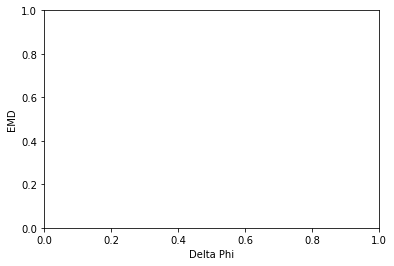

In [19]:
x = 2

non_rotated = copy.deepcopy(Ps[x])
rotated = copy.deepcopy(Ps[x])

center_phi(rotated)
center_phi(non_rotated)

EMD_values = []
phi_values = []
# diff_EMD_values = []
# diff_phi_values = []


for i in range(62):
    phi_values.append(i/10);
    rotate(rotated, 0.1)
    emdval, G = ef.emd.emd(non_rotated, rotated, R=3, return_flow=True)
    EMD_values.append(emdval)



    
# plt.scatter(phi_values, EMD_values)
plt.xlabel("Delta Phi")
plt.ylabel("EMD")
# plt.show()


# for i in range (len(phi_values)):
#     print(phi_values[i])
#     print(EMD_values[i])
    
    

# rotate(non_rotated, 0.5);
# rotate(rotated, 0.6);
# plot_jet(non_rotated, rotated);

    


new_non_rotated = copy.deepcopy(Ps[x])
new_rotated = copy.deepcopy(Ps[x])

center_phi(new_non_rotated)
center_phi(new_rotated)
rotate(new_non_rotated, 5.9)
rotate(new_rotated, 6)


emdval, G = ef.emd.emd(new_non_rotated, new_rotated, R=3, return_flow=True)
emd_with_5, G = ef.emd.emd(non_rotated, new_non_rotated, R=3, return_flow=True)
emd_with_6, G = ef.emd.emd(non_rotated, new_rotated, R=3, return_flow=True)

# print(new_rotated)
# print(new_non_rotated)
# new_rotated=new_rotated[1:]
# new_non_rotated=new_non_rotated[1:]

new_emd, G = ef.emd.emd(new_rotated, new_non_rotated, R=3, return_flow=True)

# plot_jet(new_rotated)
# plot_jet(new_non_rotated)

# print(new_rotated)
# print(new_non_rotated)

# print("rotated by 5 vs 6")
# print(new_emd)
# print("rotated by 5 vs non rotated")
# print(emd_with_5)
# print("rotated by 6 vs non rotated")
# print(emd_with_6)
# print(new_emd)

# # print(new_non_rotated)
# # print(new_rotated)

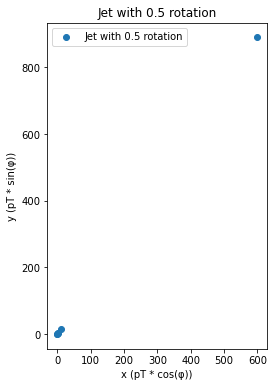

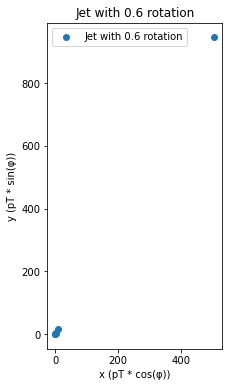

In [20]:
def plot_jet(jet, title="Jet"):
    # Extract pT (transverse momentum) and phi (azimuthal angle) for each particle
    pT_values = [particle[0] for particle in jet]  # Assuming pT is stored in the first index
    phi_angles = [particle[2] for particle in jet]  # Assuming phi is stored in the third index
    
    # Convert pT and phi to Cartesian coordinates
    x_coords = [pT * np.cos(phi) for pT, phi in zip(pT_values, phi_angles)]
    y_coords = [pT * np.sin(phi) for pT, phi in zip(pT_values, phi_angles)]
    
    # Plot the particles in 2D space with correct distribution
    plt.figure(figsize=(6,6))
    plt.scatter(x_coords, y_coords, label=title)
    plt.title(title)
    plt.xlabel("x (pT * cos(φ))")
    plt.ylabel("y (pT * sin(φ))")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()
    
x = 7
y = 8

rotated_75 = copy.deepcopy(Ps[x])
rotated_125 = copy.deepcopy(Ps[x])

center_phi(rotated)
center_phi(non_rotated)

rotate(rotated_75, 0.75)
rotate(rotated_125, 1.25)
    
# Example usage



x = 10

rotated_5 = copy.deepcopy(Ps[x])
rotated_6 = copy.deepcopy(Ps[x])

center_phi(rotated)
center_phi(non_rotated)


rotate(rotated_5, 0.5);
rotate(rotated_6, 0.6);

plot_jet(rotated_5, title="Jet with 0.5 rotation")
plot_jet(rotated_6, title="Jet with 0.6 rotation")
# print(n)



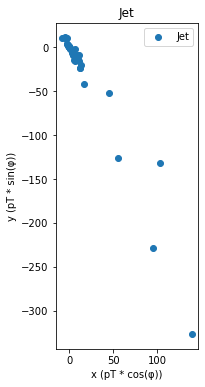

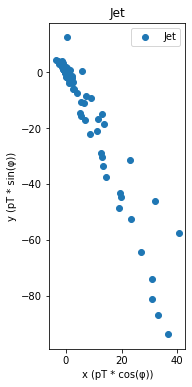

[[ 1.67601364e+02 -5.99878848e-01 -9.08007001e-01]
 [ 7.88017416e+00  2.05101207e-01 -1.08001749e+00]
 [ 6.58624315e+00 -1.09822309e+00 -3.75599647e-01]
 [ 6.91292725e+01 -5.85349619e-01 -8.55775155e-01]
 [ 3.02449632e+00  1.14465825e-01 -7.74327269e-01]
 [ 2.68460579e+01 -5.80880821e-01 -1.12008917e+00]
 [ 1.07012253e+01 -2.53695726e-01  1.83995627e+00]
 [ 4.73084831e+00 -3.72059792e-01  2.19103362e+00]
 [ 1.37399349e+01 -6.66766346e-01 -6.53566816e-01]
 [ 1.37549774e+02 -5.76173067e-01 -1.15651284e+00]
 [ 6.56712651e-01  4.59309220e-02  2.14696515e+00]
 [ 9.32780266e+00 -6.06432140e-01 -1.13815834e+00]
 [ 1.22111568e+01  2.08245769e-01 -7.90141985e-01]
 [ 1.01538098e+00 -5.90901315e-01  2.21922359e+00]
 [ 2.70115376e+01 -6.23359799e-01 -1.08086448e+00]
 [ 3.55016235e+02 -5.85609138e-01 -1.16746499e+00]
 [ 1.32600222e+01 -7.94307351e-01  2.22570823e+00]
 [ 1.22271767e+01 -2.61394858e-01  1.99125326e+00]
 [ 1.48920994e+01 -5.37451208e-01 -1.21864203e+00]
 [ 1.02987127e+01 -5.84007978e-

In [51]:
x = 7

parton = Ps[x]
hadron = Hs[x]

emd, G = ef.emd.emd(parton, hadron, R=3, return_flow=True)

# print(parton)
# print(hadron)






maxParton = 0
max2Parton = 0
for i in range(len(parton)):
    particle = parton[i]
    if(particle[0] > parton[maxParton][0]):
        max2Parton = maxParton
        maxParton = i
    elif(particle[0] > parton[max2Parton][0]):
        max2Parton = i
        

maxHadron = 0
max2Hadron = 0
for i in range(len(hadron)):
    particle = hadron[i]
    if(particle[0] > hadron[maxHadron][0]):      
        max2Hadron = maxHadron
        maxHadron = i
    elif(particle[0] > hadron[max2Hadron][0]):
        max2Hadron = i



center_phi(parton)
center_phi(hadron)  


plot_jet(parton)
plot_jet(hadron)

print(parton)
print(hadron)


highestParton = parton[maxParton]
secondHighestParton = parton[max2Parton]

highestHadron = hadron[maxHadron]
secondHighestHadron = hadron[max2Hadron]

print("EMD before rotating")
print(emd)

print(highestParton)
print(secondHighestParton)

print(highestHadron)
print(secondHighestHadron)


    